In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from astropy.io import fits
from reproject.mosaicking import find_optimal_celestial_wcs

from adler.utilities.cutout_utilities import diaSource_cutout

In [2]:
dc_dict = {
    "diaSourceId": np.int64(600403739123122199),
    "ra": np.float64(53.45738556095445),
    "dec": np.float64(-28.378704517611503),
    "visit": np.int64(2024112700161),
    "detector": np.int64(8),
}

In [3]:
# # query just by diaSourceId, additional image info query will run
# dc = diaSource_cutout.diaSource_cutout(600403739123122199)

# # Pass all unique cutout info to run faster
# dc = diaSource_cutout.diaSource_cutout(600456547088203794, visit = 2024112700161, detector = 8, ra = 53.45738556095445, dec = -28.378704517611503)

# Or just pass an existing dict
dc = diaSource_cutout(**dc_dict)

In [4]:
# look at the attributes of the diaSource_cutout class
dc.__dict__

{'diaSourceId': np.int64(600403739123122199),
 'ra': np.float64(53.45738556095445),
 'dec': np.float64(-28.378704517611503),
 'radius': <Quantity 0.01 deg>,
 'calib_level': [3],
 'visit': np.int64(2024112700161),
 'detector': np.int64(8),
 'dataset': 'dp1',
 'outdir': '.',
 'outfile': 'cutout-600403739123122199',
 'service_tap': TAPService(baseurl : 'https://data.lsst.cloud/api/tap', description : 'None'),
 'service_sia': SIA2Service(baseurl : 'https://data.lsst.cloud/api/sia/dp1', description : 'None')}

In [5]:
# run the cutout query, will save a fits file
dc.sodaCutout()

SELECT access_url, calib_level FROM ivoa.ObsCore
            WHERE lsst_visit = 2024112700161 AND lsst_detector = 8 AND calib_level = 3
            
Job phase is COMPLETED
                                                                access_url                                                                 ...
------------------------------------------------------------------------------------------------------------------------------------------ ...
https://data.lsst.cloud/api/datalink/links?ID=ivo%3A%2F%2Forg.rubinobs%2Flsst-dp1%3Frepo%3Ddp1%26id%3D33626032-8321-4463-ad18-3a4136874479 ... 1
https://data.lsst.cloud/api/datalink/links?ID=ivo%3A%2F%2Forg.rubinobs%2Flsst-dp1%3Frepo%3Ddp1%26id%3D33626032-8321-4463-ad18-3a4136874479 3
Datalink status: ('OK', 'QUERY_STATUS not specified'). Datalink service url: https://data.lsst.cloud/api/datalink/links?ID=ivo%3A%2F%2Forg.rubinobs%2Flsst-dp1%3Frepo%3Ddp1%26id%3D33626032-8321-4463-ad18-3a4136874479


Fits WCS pos = (array(182.46881319), array(179.12785497))
ExposureF WCS pos = (179.68, 179.47)


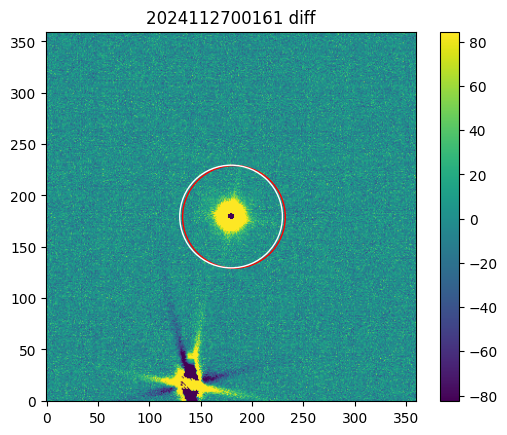

In [7]:
# display the image
fig = dc.plot_img(3)

In [10]:
# find the best projection for the image
hdu = fits.open(dc.cutout_file_diff)
print(hdu.info())
wcs_out, shape_out = find_optimal_celestial_wcs(hdu["PRIMARY"])
print(wcs_out)
print(shape_out)

Filename: ./cutout-600403739123122199_3.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     125   (360, 360)   float32   
None
WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN' 'DEC--TAN' 
CRVAL : 53.382347378259084 -28.099314454616415 
CRPIX : 1440.0301980343736 5278.303066145428 
PC1_1 PC1_2  : 1.0 0.0 
PC2_1 PC2_2  : 0.0 1.0 
CDELT : -5.560591914359228e-05 5.560591914359228e-05 
NAXIS : 0  0
(509, 509)


Fits WCS pos = (array(251.72312906), array(252.42746894))
ExposureF WCS pos = (179.68, 179.47)
cutout-600403739123122199.png


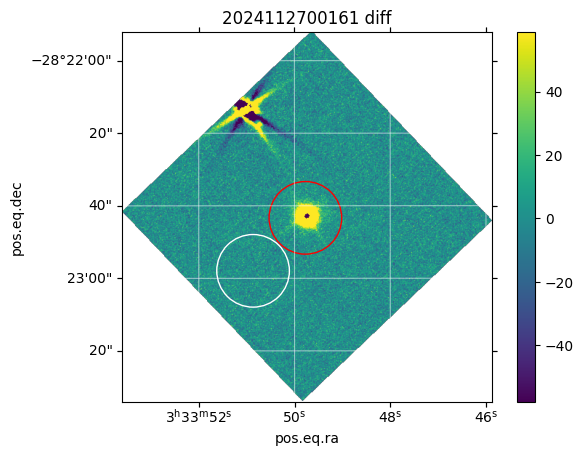

In [14]:
# plot and save the image visualisation
fig = dc.plot_img(3, plot_wcs = True, wcs_reproj = wcs_out, shape_reproj = shape_out)    
fname_png = ".".join([dc.outfile.split(".")[0],"png"])
print(fname_png)
plt.savefig(fname_png)
plt.show()